## [MAIN QUEST 02] 가랏 몬스터볼! 전설의 포켓몬 찾아 삼만리
---
### 개요
포켓몬 이름, 속성, HP, 공격력, 방어력 속도를 포함한 721마리의 포켓몬이 포함된 데이터셋을 활용해서 전설의 포켓몬인지 아닌지를 구별해내는 탐색적 데이터 분석(EDA; Exploratory Data Analysis)을 해낸다.

---
### 목차
1. 포켓몬 데이터셋 불러오기 및 확인
2. 데이터 전처리
3. 베이스라인 모델 학습 및 분석
4. 비교 모델 학습 비교 및 분석
5. 회고

---
### 1. 포켓몬 데이터셋 불러오기 및 확인

##### 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # Jupyter Notebook에서 생성되는 그래프의 해상도를 높여준다

##### 데이터셋 불러오기

In [5]:
csv_path = "C:\mango\AIffel\AIFFEL_quest_cr\MainQuest\Quest02\Pokemon.csv"
original_data = pd.read_csv(csv_path)

In [7]:
# 데이터셋 복사본 만들기
pokemon = original_data.copy()
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [10]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [11]:
# 일반 포켓몬의 데이터셋
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


##### 포켓몬 데이터셋의 전체 컬럼

In [12]:
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

. # : 포켓몬 ID number. 성별이 다르지만 같은 포켓몬인 경우 등은 같은 #값을 가진다. (int)

Name : 포켓몬 이름. 포켓몬 각각의 이름으로 저장되고, 800개의 포켓몬의 이름 데이터는 모두 다르다. (str)

Type 1 : 첫 번째 속성. 속성을 하나만 가지는 경우 Type 1에 입력된다. (str)

Type 2 : 두 번째 속성. 속성을 하나만 가지는 포켓몬의 경우 Type 2는 NaN(결측값)을 가진다. (str)

Total : 전체 6가지 스탯의 총합. (int)

HP : 포켓몬의 체력. (int)

Attack : 물리 공격력. (scratch, punch 등) (int)

Defense : 물리 공격에 대한 방어력. (int)

Sp. Atk : 특수 공격력. (fire blast, bubble beam 등) (int)

Sp. Def : 특수 공격에 대한 방어력. (int)

Speed : 포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정. (더 높은 포켓몬이 먼저 공격한다) (int)

Generation : 포켓몬의 세대. 현재 데이터에는 6세대까지 있다. (int)

Legendary : 전설의 포켓몬 여부. Target feature (bool)

##### 결측치 확인

In [16]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Type 2 컬럼에 386개의 결측치

##### 중복값 확인

In [14]:
# ID 컬럼(#)의 가짓수
len(set(pokemon["#"]))

721

전체 데이터는 800개이나, 721가지의 데이터들이 존재

In [15]:
# 같은 # 값을 가지는 포켓몬 확인
pokemon[pokemon["#"] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


6의 #을 가진 포켓몬은 Charizard, CharizardMega Charizard X, CharizardMega Charizard Y 세 개로 나뉜다.

기본 포켓몬, X, Y 버전으로 나뉘는 것을 확인

In [18]:
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

Type 1에는 총 18가지, Type 2에는 총 19가지의 속성

In [20]:
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

Type 2 와 Type 1 의 차집합은 nan이기에 nan을 제외하면 모두 같은 세트의 데이터가 들어있다.

In [24]:
print(pokemon["Type 1"].isna().sum(), pokemon["Type 2"].isna().sum())

0 386


총 386개의 포켓몬은 속성을 하나만 가지고, 나머지는 두 개의 속성을 가진다.

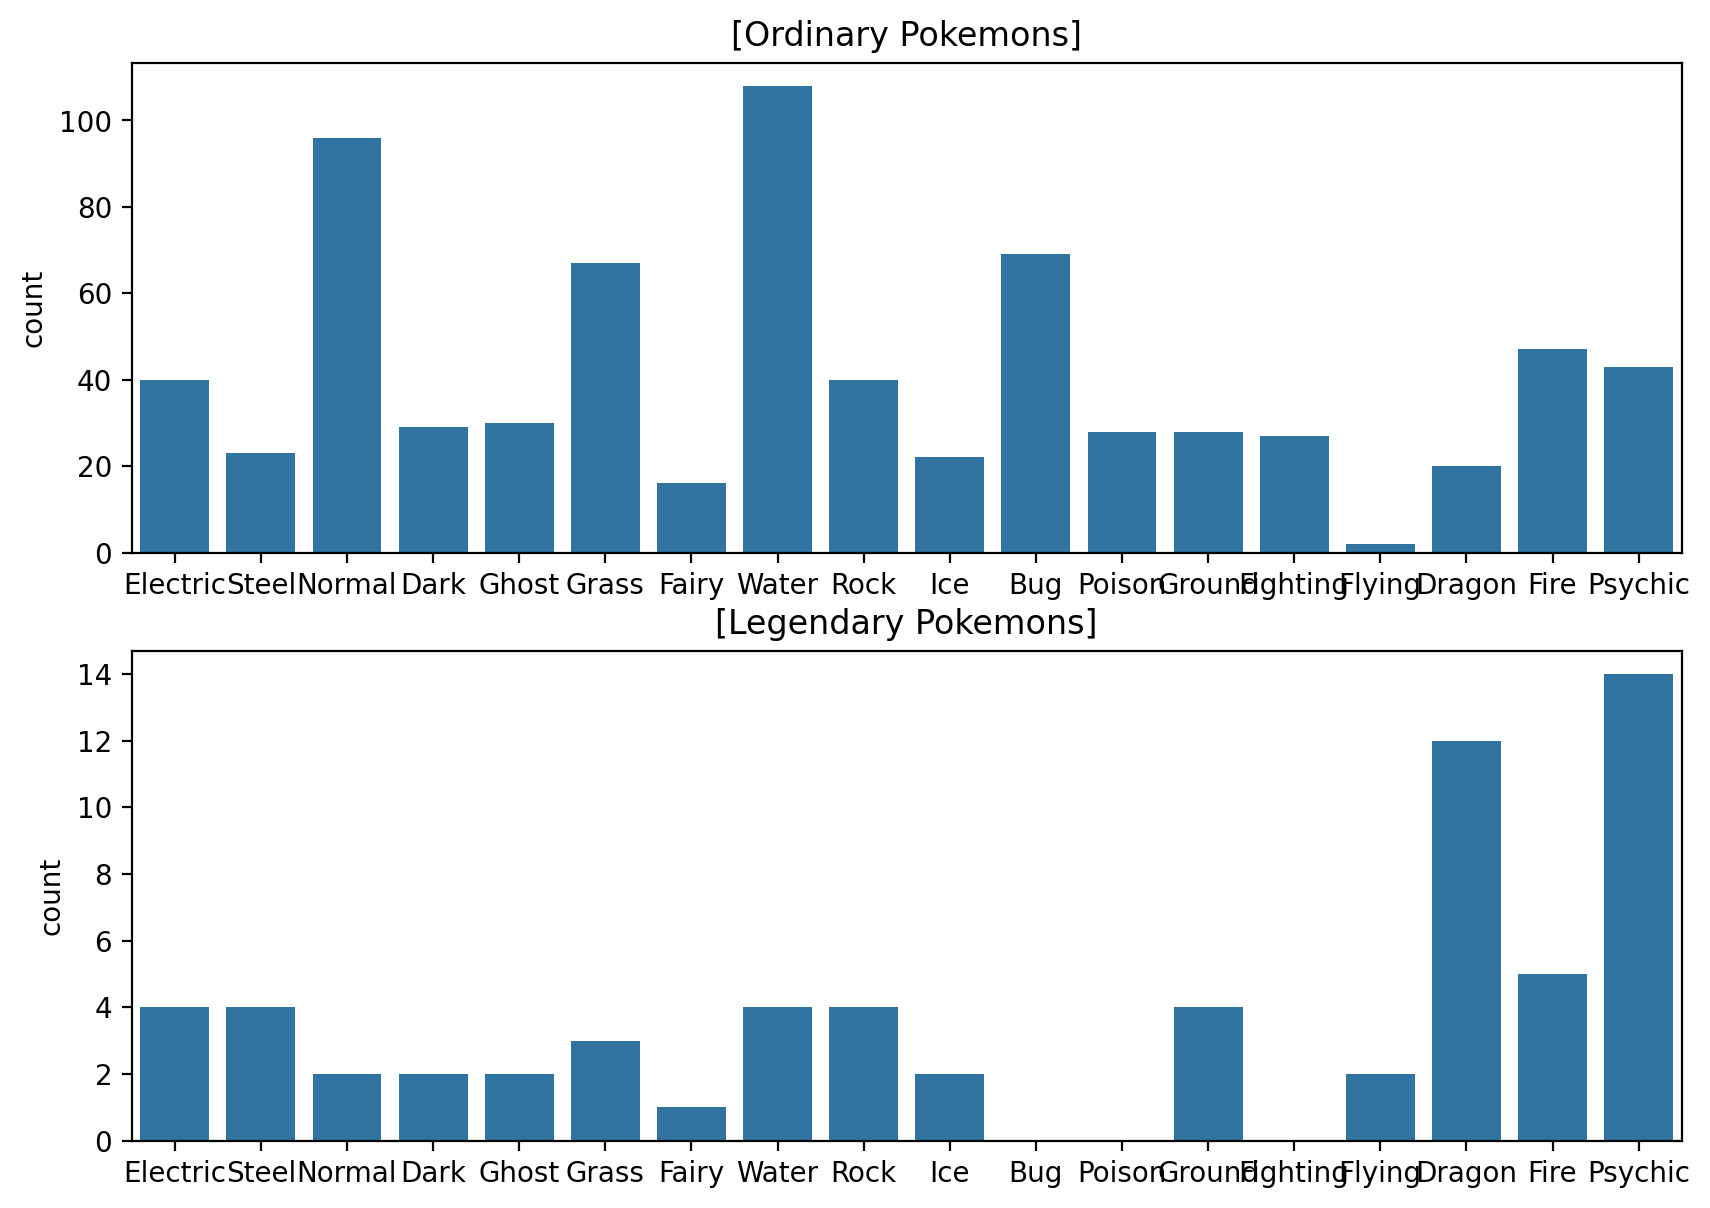

In [26]:
types = list(set(pokemon["Type 1"]))

# Type 1 데이터 분포포
plt.figure(figsize=(10, 7)) 

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

일반 포켓몬에는 Normal, Water의 속성이 가장 많지만, 전설의 포켓몬에는 Dragon, Psychic 속성이 많다.

In [27]:
# Type1별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


Legendary 비율이 가장 높은 속성은 50% 비율의 Flying이다.

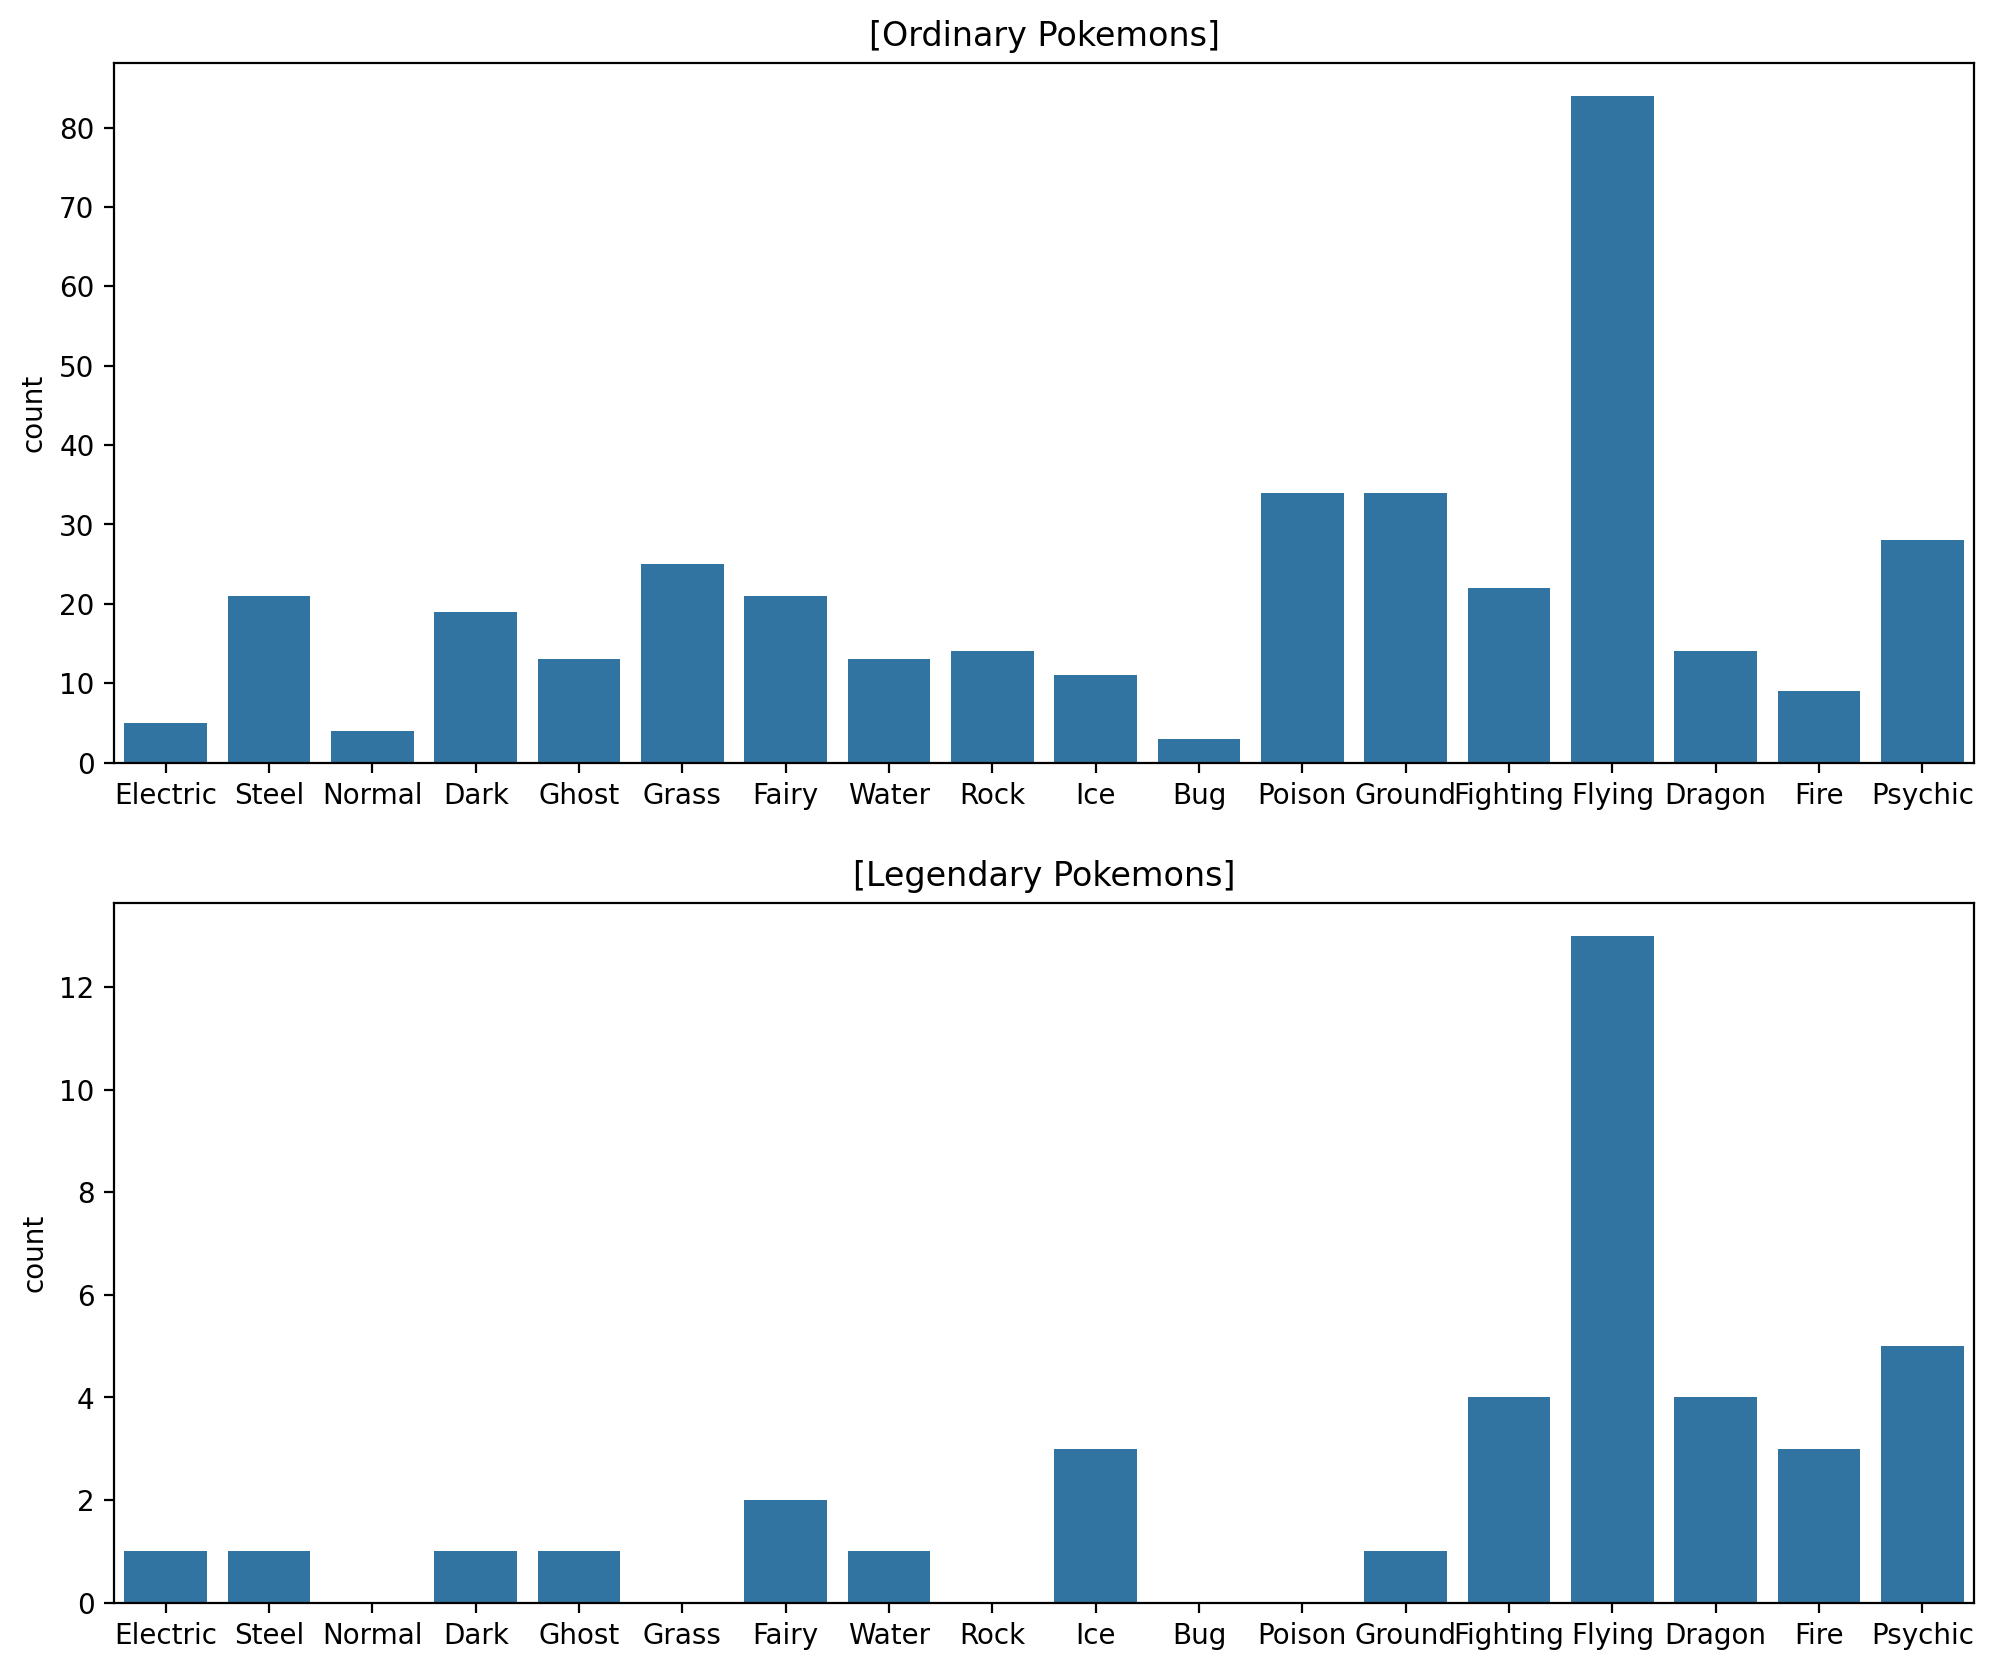

In [28]:
# Type 2 데이터 분포

plt.figure(figsize=(12, 10))

plt.subplot(211)
sns.countplot(data=ordinary,  x="Type 2", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

Flying 속성의 경우 두 경우 다 가장 많지만, 일반 포켓몬에는 Grass, Rock, Poison같은 속성이 많은 반면 전설의 포켓몬은 없다

In [29]:
# Q. Type 2에 대한 피벗 테이블
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


Type 2에서는 Fire 속성 포켓몬의 Legendary 비율이 25%로 가장 높다.

In [32]:
# 모든 스탯의 종류
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

# 첫번째 포켓몬의 Total 값과 stats 총합 확인
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats", sum(list(pokemon.loc[0, stats])))

total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats 318


In [33]:
(pokemon['Total'].values == pokemon[stats].values.sum(axis=1)).sum()

800

모든 포켓몬이 total 값과 stats 총합이 같다.

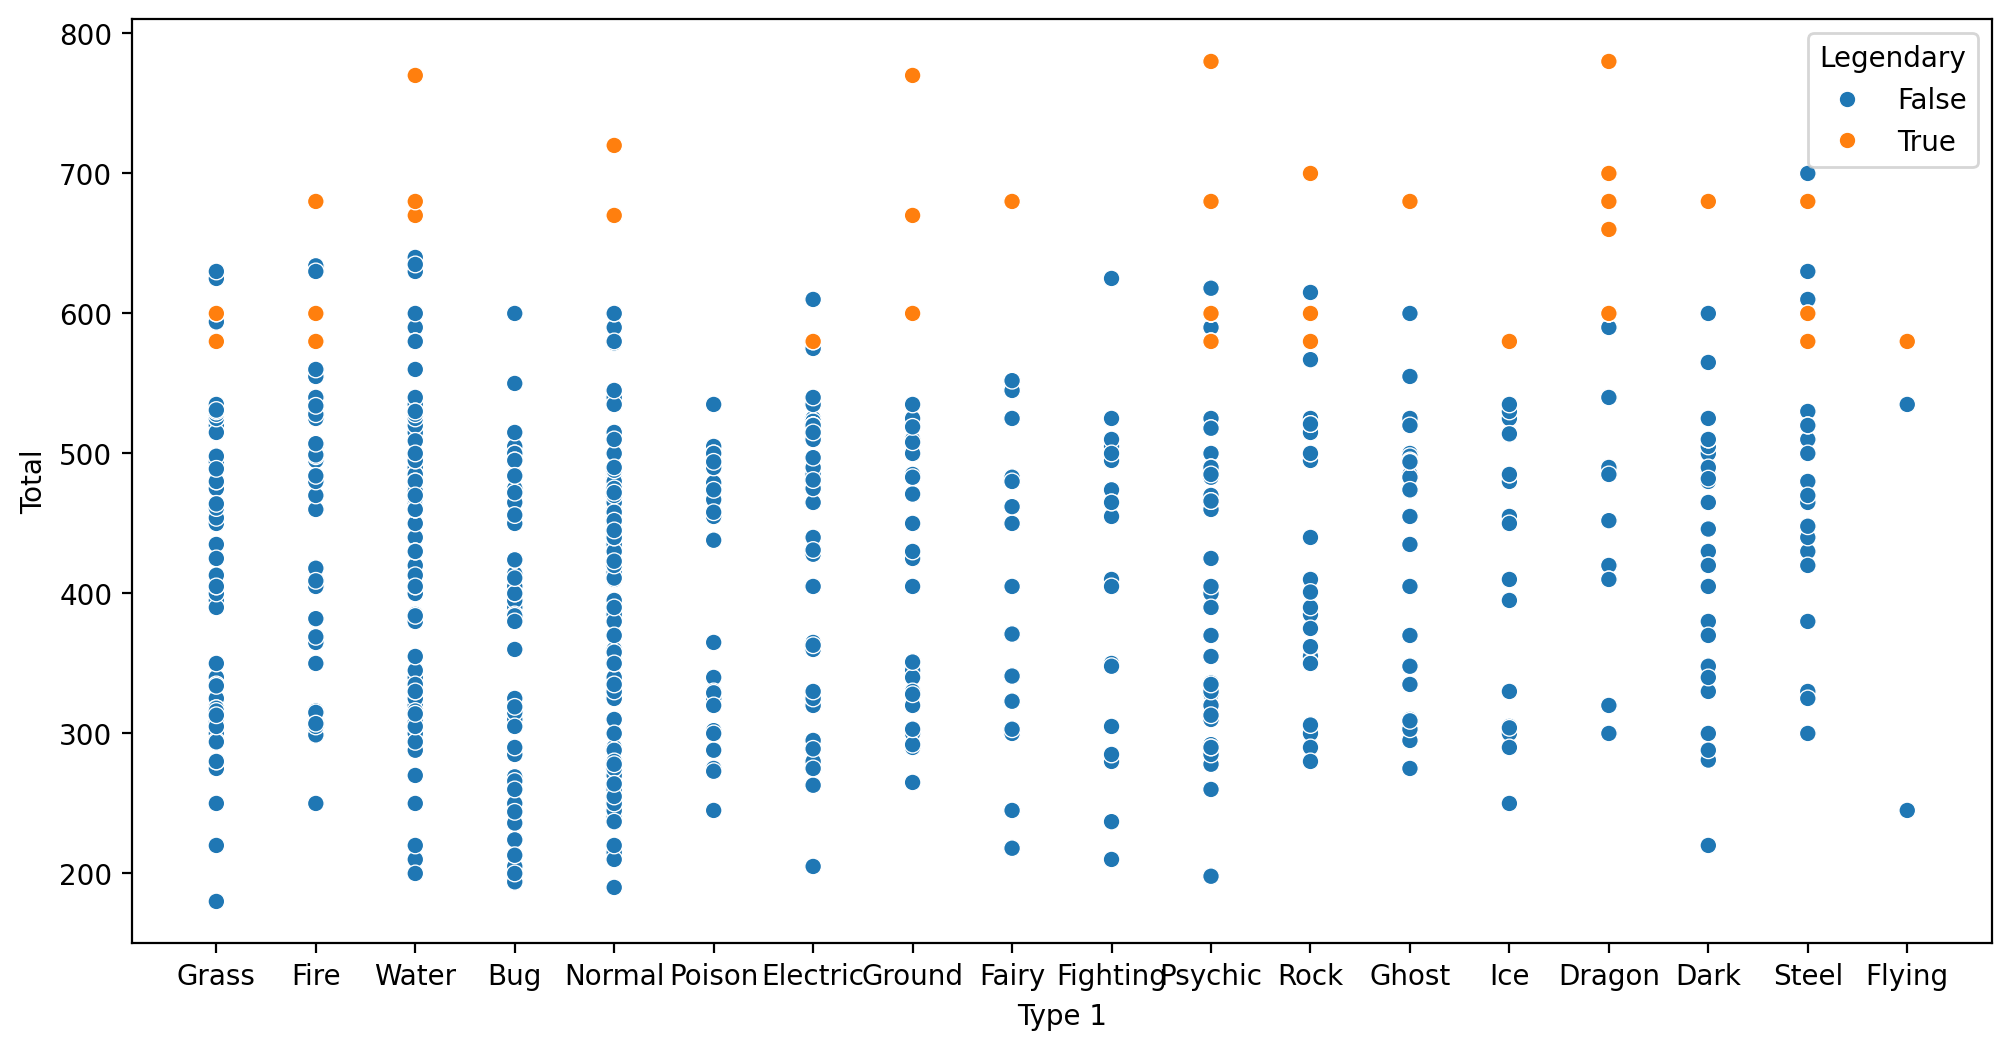

In [34]:
# Total 값에 따른 분포
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

Type 1별로 Total 값을 확인했을 때, 전설의 포켓몬은 주로 Total 스탯값이 높다.

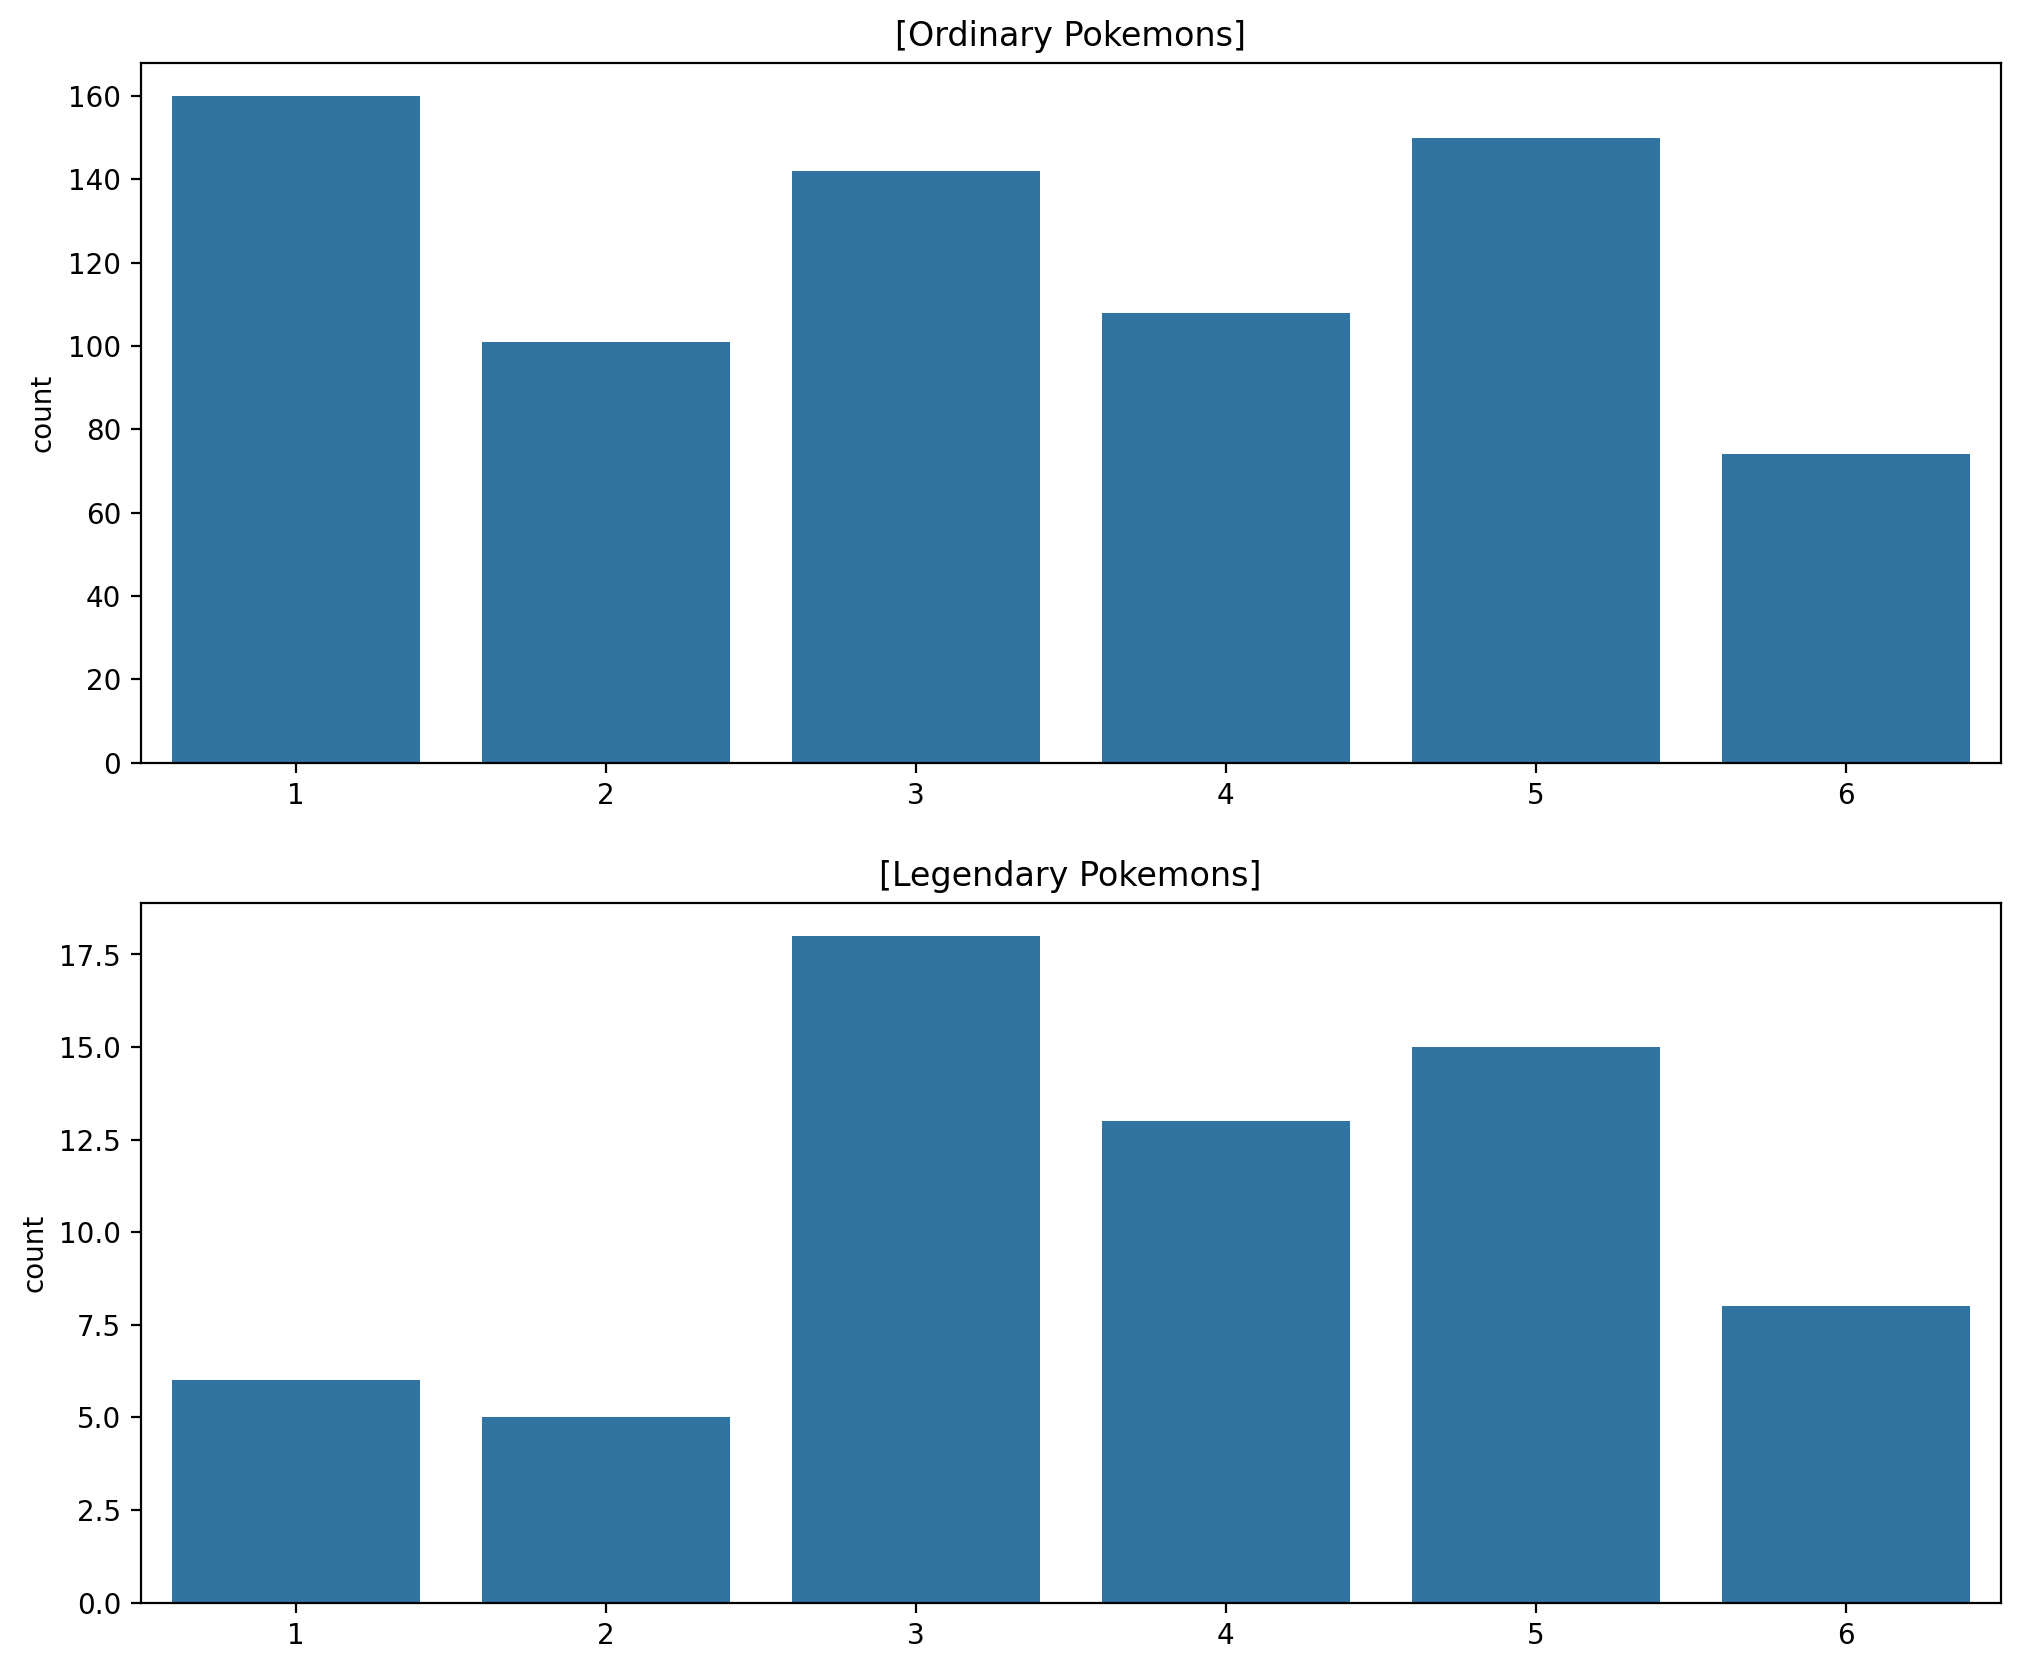

In [35]:
# 포켓몬의 세대
plt.figure(figsize=(12, 10))

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

전설의 포켓몬은 1,2세대에는 적었지만 3세대부터 많아졌다가 6세대에 다시 줄어든 것을 확인

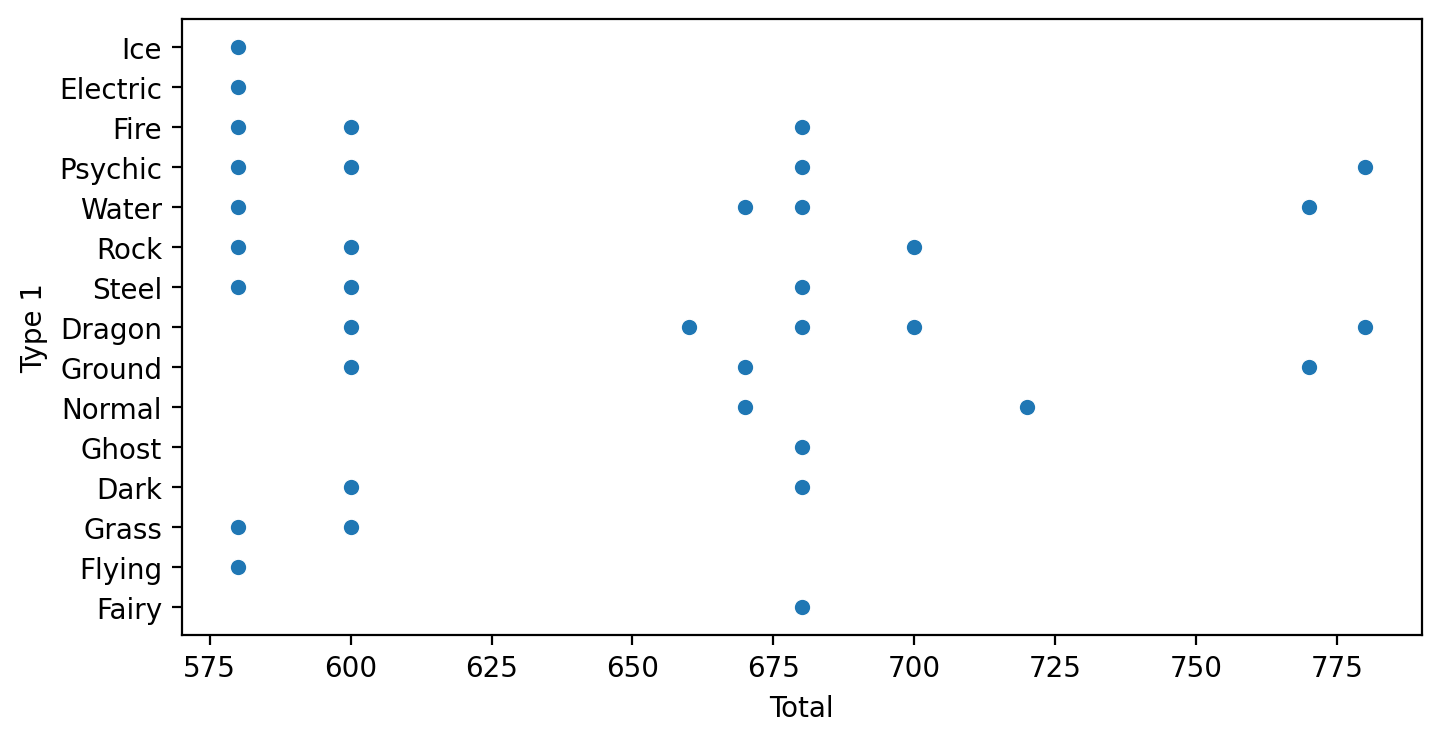

In [36]:
# 전설의 포켓몬의 Total 값

fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

전설의 포켓몬들이 600, 700과 같은 특정한 값에 몰려있다.

In [37]:
# 전설의 포켓몬의 Total 종류
print(sorted(list(set(legendary["Total"]))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


Total값의 종류가 9가지밖에 안된다.

In [40]:
# 일반 포켓몬의 Total 종류
print(len(set(ordinary["Total"])))

print(round(65 / 9, 2), round((800-65)/195,2))

195
7.22 3.77


일반 포켓몬은 총 195가지의 Total 속성 값을 가진다.

전설의 포켓몬은 약 7.22마리 끼리는 같은 Total 스탯 값을 가지며
일반 포켓몬은 약 3.77마리 끼리 같은 Total 스탯 값을 가진다.

즉, Total 값은 Legendary인지 아닌지를 예측하는 데에 중요한 컬럼이다.

In [42]:
# 전설의 포켓몬은 이름의 길이가 긴 경우때문에 데이터셋에 이름 길이 컬럼 생성
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))
legendary.head() 

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [44]:
# ordinary 포켓몬의 데이터에도 'name_count' 값을 추가
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


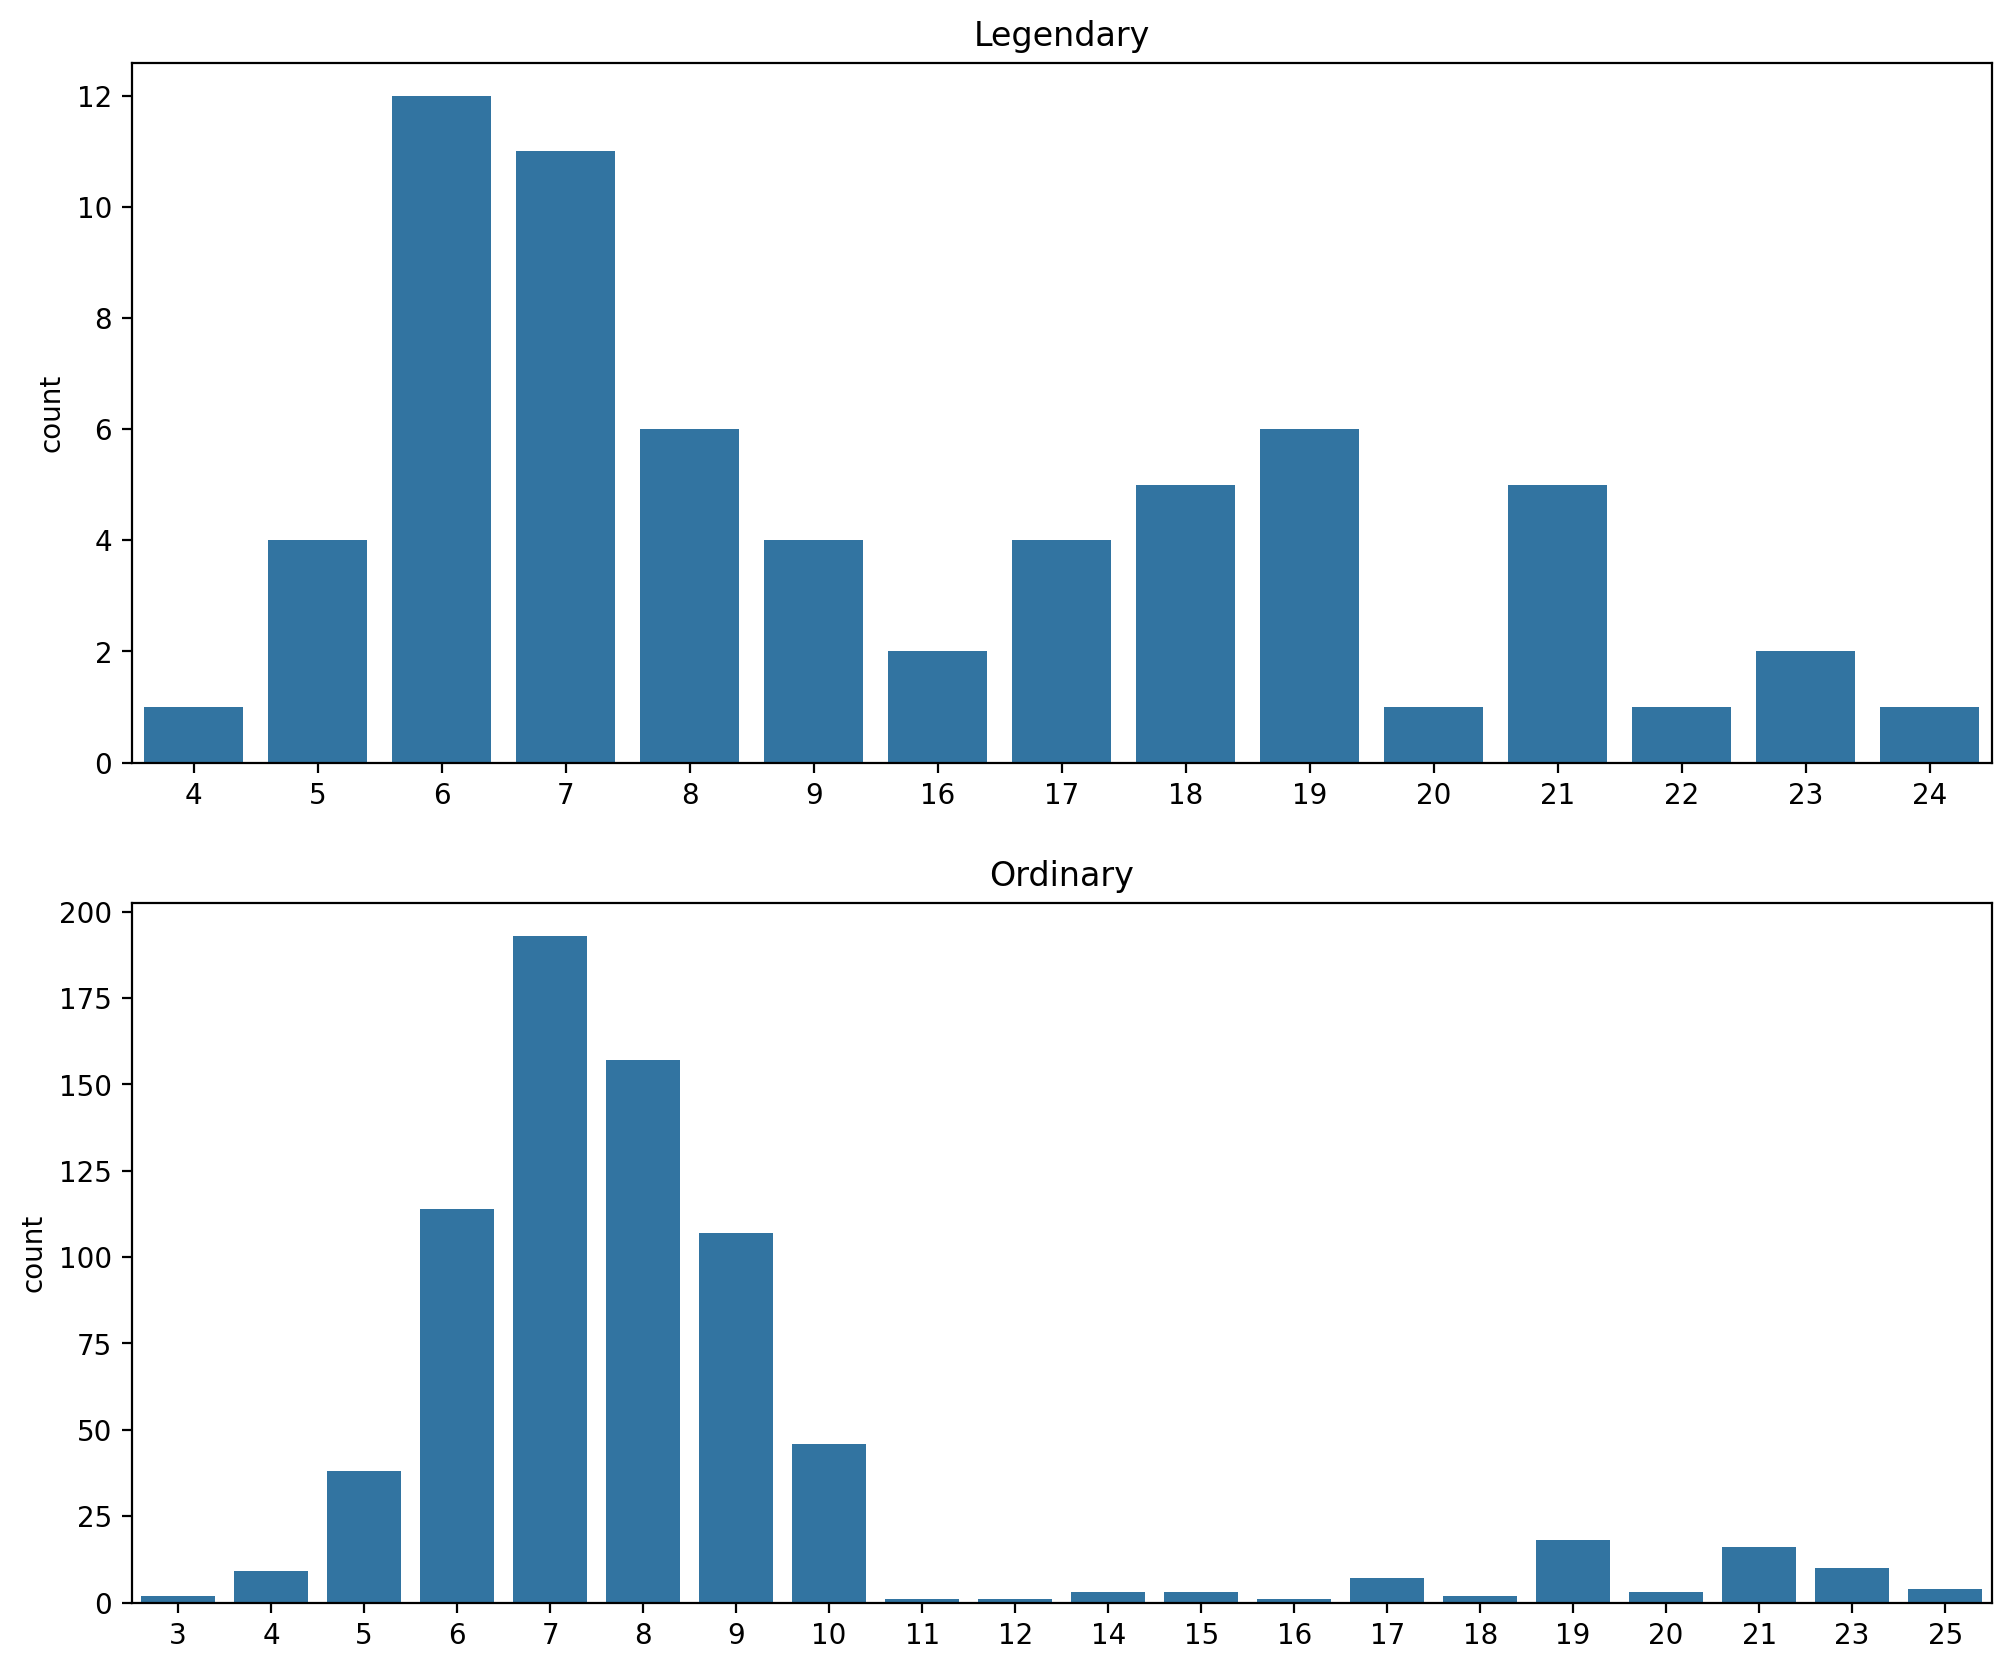

In [45]:
plt.figure(figsize=(12, 10))  

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

위 그래프에서, 전설의 포켓몬은 16 이상의 긴 이름을 가진 포켓몬이 많은 반면, 일반 포켓몬은 10 이상의 길이를 가지는 이름의 빈도가 아주 낮다.

In [46]:
# 전설의 포켓몬의 이름이 10 이상일 확률
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")
# 일반 포켓몬의 이름이 10 이상일 확률
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

41.54 %
15.65 %


전설의 포켓몬의 이름이 10 이상일 확률은 41%를 넘는 반면에, 일반 포켓몬의 이름이 10 이상일 확률은 15% 이상이다.

따라서 전설의 포켓몬은 긴 이름을 가졌을 확률이 높다.

---
### 2. 데이터 전처리

##### 이름의 길이가 10 이상인지 아닌지

In [47]:
# 이름의 길이를 확인할 수 있는 name_count 컬럼 생성
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [49]:
# 이름의 길이가 10 이상이면 True, 미만이면 False를 가지는 long_name 컬럼 생성
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


##### 이름에 자주 쓰이는 토큰 추출

In [50]:
# 이름에 알파벳이 아닌 문자가 들어간 경우 전처리
# 알파벳 체크를 위해 띄어쓰기가 없는 컬럼 생성
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ",""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [51]:
# isalpha() 함수를 이용해 이름이 알파벳으로만 이루어졌는지 확인
pokemon["name_isalph"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalph
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [53]:
print(pokemon[pokemon["name_isalph"] == False].shape)
pokemon[pokemon["name_isalph"] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalph
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


9마리의 포켓몬이 이름에 알파벳이 아닌 것을 포함한다.

In [54]:
# 알파벳이 아닌 문자 제거
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalph
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [57]:
# 바꿔준 'Name' 컬럼으로 'Name_nospace'를 만들고, 다시 isalpha()로 확인
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ",""))
pokemon["name_isalph"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon[pokemon["name_isalph"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalph


모든 이름이 알파벳으로만 이루어졌다.

In [60]:
# 토큰화 함수 생성성
import re # 정규식 re 패키지

def tokenize(name):
    tokens = []
    for part_name in name.split():
        a = re.findall('[A-Z][a-z]*', part_name) # 대문자로 시작해서 소문자로 끝나는 토큰들 분리
        tokens.extend(a)
    return np.array(tokens)

In [61]:
# 전설의 포켓몬의 이름에 사용된 토큰 모아보기
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

중복을 제외한 65개의 토큰이 있다.

In [62]:
# 10가지의 가장 많이 전설의 포켓몬 이름에 사용된 토큰
from collections import Counter

most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

In [63]:
# 토큰이 전설의 포켓몬의 이름에 있는지의 여부를 나타내는 컬럼 생성
for token, _ in most_common:
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


##### Type 1 & Type 2 범주형 데이터 전처리

In [66]:
# 18개의 컬럼에 대한 원-핫 인코딩
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)
    
pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Electric,Steel,Normal,Dark,Ghost,Grass,Fairy,Water,Rock,Ice,Bug,Poison,Ground,Fighting,Flying,Dragon,Fire,Psychic
0,Grass,Poison,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
1,Grass,Poison,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
2,Grass,Poison,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
3,Grass,Poison,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
4,Fire,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


0번 포켓몬의 경우 풀, 독 속성이기에 풀과 독에 True을 가진다

---
### 3. 베이스라인 모델 학습 및 분석

In [67]:
# 원본 데이터의 컬럼 확인
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [70]:
# 원본 데이터 중 의미 없는 컬럼인 # 와 문자열 데이터인 Name, Type 1, Type 2 데이터 그리고 target 데이터인 Legendary 제거
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
X = original_data[features]

# target 데이터 변수 생성
target = 'Legendary'
y = original_data[target]

In [71]:
# 훈련 데이터와 테스트 데이터로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


학습 데이터에는 640개의 데이터가, 테스트 데이터에는 160개의 데이터

In [72]:
# 의사 결정 트리 모델 불러오기
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=25)

In [73]:
# 모델 학습 및 예측
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [74]:
# 혼동 행렬로 예측한 y_pred 값이 실제 정답인 y_test 와 얼마나 비슷한지 채점
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]], dtype=int64)

데이터에서 Positive는 Legendary=True(전설의 포켓몬), Negative는 Legendary=False(일반 포켓몬)을 나타낸다.

총 160개의 학습 데이터 중 FP와 FN은 총 8개뿐이다.

In [76]:
# classification_report를 활용한 평가 지표
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



recall = TP / (FN + TP) 인데, Recall 값이 0.62로 낮게 나왔다.

##### 피쳐 엔지니어링 데이터로 학습

In [78]:
# 전처리한 데이터셋의 컬럼 확인
print(pokemon.columns)

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalph', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Electric', 'Steel', 'Normal', 'Dark', 'Ghost', 'Grass', 'Fairy',
       'Water', 'Rock', 'Ice', 'Bug', 'Poison', 'Ground', 'Fighting', 'Flying',
       'Dragon', 'Fire', 'Psychic'],
      dtype='object')


In [83]:
# 의미 없는 ID, 문자열 데이터인 Name, name_nospace, name_isalpha, 원-핫 인코딩 처리한 Type 1, Type 2, target 데이터인 Legendary 제거
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']
X = pokemon[features]

# target 데이터 생성
target = "Legendary"
y = pokemon[target]

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [84]:
# 모델 생성
model = DecisionTreeClassifier(random_state=25)

# 모델 학습 및 예측
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [85]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[141,   6],
       [  1,  12]], dtype=int64)

FP 와 FN 이 7개로 줄었다.

In [86]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



Recall 값이 0.92로 늘었다.

In [91]:
X_test

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
270,680,106,130,90,110,154,90,2,5,False,...,False,False,False,False,False,False,False,False,False,False
475,480,65,76,84,54,96,105,4,7,False,...,False,False,False,False,False,False,False,False,False,False
158,580,90,100,90,125,85,90,1,7,False,...,False,False,False,False,False,False,False,False,False,False
247,500,75,90,50,110,80,95,2,8,False,...,True,False,False,False,False,False,False,False,False,False
452,515,60,70,65,125,105,90,4,8,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,405,61,78,95,56,58,57,6,9,False,...,False,False,False,False,False,False,False,True,False,False
548,600,100,100,100,100,100,100,4,7,False,...,False,False,False,False,False,False,False,False,False,False
618,325,50,65,85,35,35,55,5,7,False,...,False,False,False,False,False,False,True,False,False,False
785,494,55,85,122,58,75,99,6,19,True,...,False,False,False,True,False,False,False,True,False,False


---
### 4. 비교 모델 학습 및 분석

##### 랜덤 포레스트 모델

In [94]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=35)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [95]:
confusion_matrix(y_test, rf_pred)

array([[143,   4],
       [  3,  10]], dtype=int64)

In [96]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

       False       0.98      0.97      0.98       147
        True       0.71      0.77      0.74        13

    accuracy                           0.96       160
   macro avg       0.85      0.87      0.86       160
weighted avg       0.96      0.96      0.96       160



정밀도가 약간 올라왔는데 재현율은 약간 떨어졌다.

##### 로지스틱 회귀 모델

In [101]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=45)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)


c:\Users\user\miniconda3\envs\aifenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
confusion_matrix(y_test, lr_pred)

array([[147,   0],
       [  7,   6]], dtype=int64)

In [105]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

       False       0.95      1.00      0.98       147
        True       1.00      0.46      0.63        13

    accuracy                           0.96       160
   macro avg       0.98      0.73      0.80       160
weighted avg       0.96      0.96      0.95       160



정밀도는 높아졌으나 재현율이 상당히 떨어졌다.

##### K-fold 교차 검증으로 모델 비교

In [106]:
from sklearn.model_selection import cross_val_score

# 의사 결정 트리 모델 검증
scores = cross_val_score(model, X, y, cv=5)
print("의사 결정 트리 교차 검증 점수:", scores)
print("평균 정확도:", scores.mean())

print()

# 랜덤 포레스트 모델 검증
scores = cross_val_score(rf_model, X, y, cv=5)
print("랜덤 포레스트 교차 검증 점수:", scores)
print("평균 정확도:", scores.mean())

# 로지스틱 회귀 모델 검증
scores = cross_val_score(lr_model, X, y, cv=5)
print("랜덤 포레스트 교차 검증 점수:", scores)
print("평균 정확도:", scores.mean())

의사 결정 트리 교차 검증 점수: [0.94375 0.9625  0.975   0.95625 0.95   ]
평균 정확도: 0.9575000000000001

랜덤 포레스트 교차 검증 점수: [0.95625 0.96875 0.95    0.925   0.9375 ]
평균 정확도: 0.9475


c:\Users\user\miniconda3\envs\aifenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\miniconda3\envs\aifenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

랜덤 포레스트 교차 검증 점수: [0.89375 0.94375 0.925   0.925   0.91875]
평균 정확도: 0.92125


c:\Users\user\miniconda3\envs\aifenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### 1:1 샘플링으로 클래스 불균형 조정

In [107]:
pokemon['Legendary'].value_counts()

Legendary
False    735
True      65
Name: count, dtype: int64

In [110]:
legendary_random = pokemon[pokemon['Legendary'] == True].sample(65, random_state=42).index.tolist()
ordinary_random = pokemon[pokemon['Legendary'] == False].sample(65, random_state=42).index.tolist()

In [112]:
random = legendary_random + ordinary_random
random_X = pokemon.loc[random, pokemon.columns != 'Legendary']
random_y = pokemon['Legendary'][random]

X_train, X_test, y_train, y_test = train_test_split(random_X, random_y, test_size=0.2, random_state=20)

print(X_train.shape)
print(X_test.shape)

(104, 44)
(26, 44)


훈련 데이터는 104개 테스트 데이터는 26개로 나뉘어졌다

In [114]:
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

ValueError: could not convert string to float: 'Regirock'

---
### 5. 회고

시간이 없어서 1:1 샘플링으로 클래스 불균형 조정하는건 아쉽게도 못했지만 아마 성공했다면 로지스틱 회귀 모델로 학습시켰을 때 더 높은 재현율과 정확도가 나오지 않았을까 싶다.